# LOAN ELIGIBILITY PREDICTION 

<b>Shrinisha N (148)<br>
    Sriprabha AR (167)<br>
    Suba Shree V S (171)<br>
    Varsha R (189)</b>

## Importing libraries and loading the dataset

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv("loan-train.csv")

In [4]:
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
dataset.shape

(614, 13)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Many missing values are present

In [7]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Exploratory Data Analysis

In [8]:
dataset['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
dataset['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

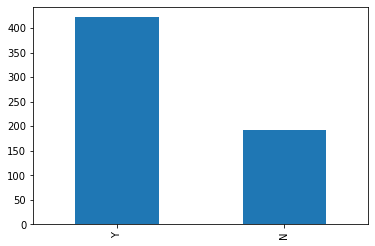

In [10]:
dataset['Loan_Status'].value_counts().plot.bar()

<b>The loan of 422(around 69%) people out of 614 were approved.<b>

### i) Univariate Analysis 

Visualizing each independent variable separately for different data types - Categorical, Ordinal & Numerical

### Categorical Variables

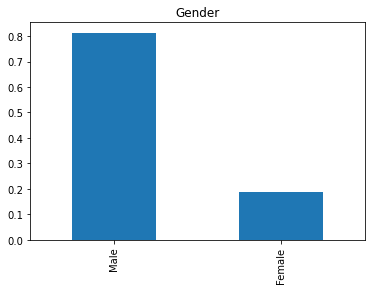

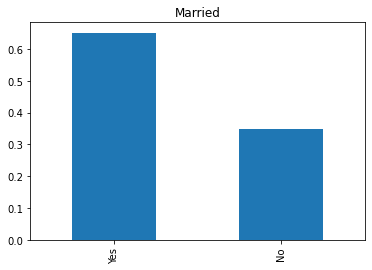

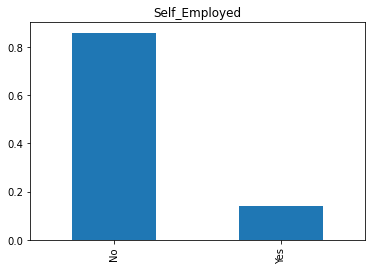

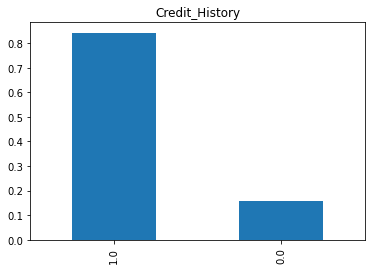

In [11]:
dataset['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
dataset['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
dataset['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
dataset['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()


<b>It can be inferred from the above bar plots that:
<li>80% of applicants in the dataset are male.</li>
<li>Around 65% of the applicants in the dataset are married.</li>
<li>Around 15% of applicants in the dataset are self-employed.</li>
<li>Around 85% of applicants have repaid their debts.</li></b>

### Ordinal Variables

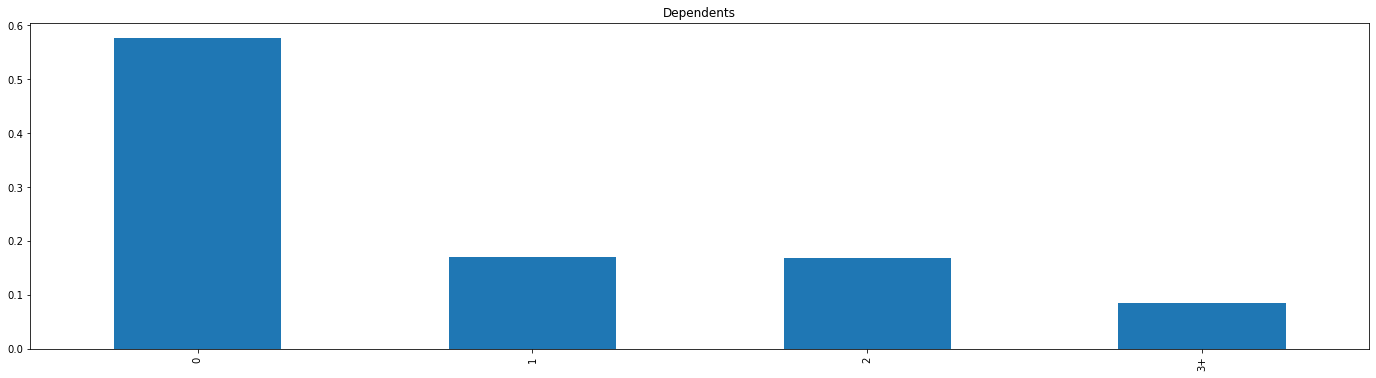

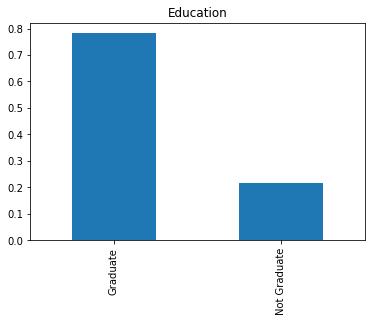

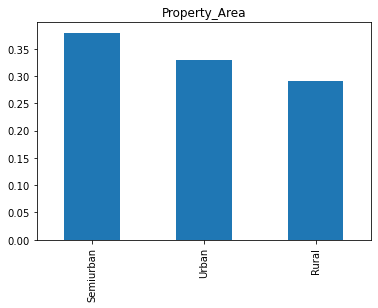

In [12]:
dataset['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()
dataset['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
dataset['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

<b>The following inferences can be made from the above bar plots:
<li>Most of the applicants don't have any dependents.</li>
<li>Around 80% of the applicants are Graduate.</li>
<li>Most of the applicants are from the Semiurban area.</li></b>

### Numerical Variables

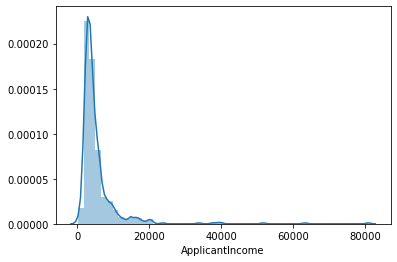

In [13]:
sns.distplot(dataset['ApplicantIncome'])
plt.show()

<b>Most of the data in the distribution of applicant income are towards the left (not normally distributed)
    We should make it normal as algorithms work better if the data is normally distributed.</b>

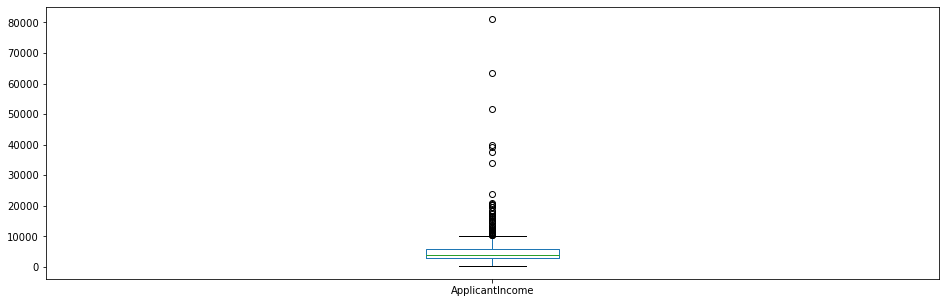

In [14]:
dataset['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

<b>The boxplot confirms the presence of a lot of outliers/extreme values. 
This can be due to the income disparity in the society. 
It also shows us that we are looking at people with different education levels. Let us segregate them by Education.</b>

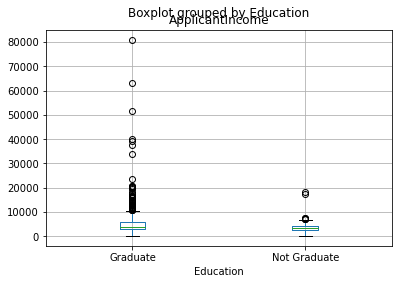

In [15]:
dataset.boxplot(column='ApplicantIncome', by = 'Education') 
plt.show()

<b>We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers.</b>

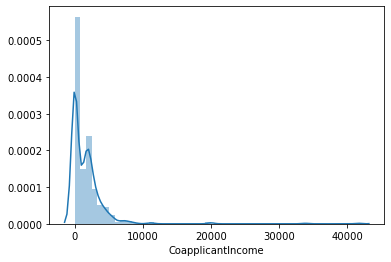

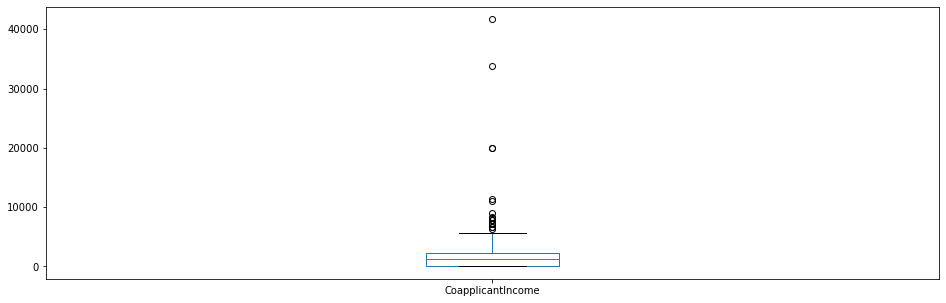

In [16]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()
dataset['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

<b> There is a similar distribution as that of the applicant's income. 
The majority of co-applicants income ranges from 0 to 5000. 
We also see a lot of outliers in the applicant's income and it is not normally distributed.</b>

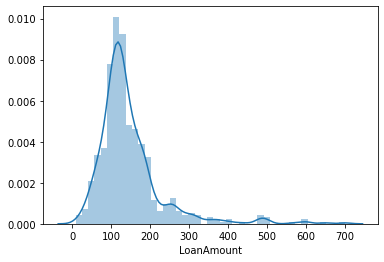

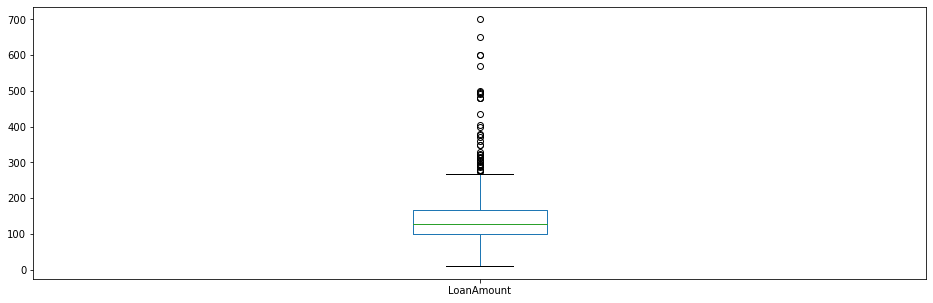

In [17]:
dataset.notna()
sns.distplot(dataset['LoanAmount'])
plt.show()
dataset['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

<b>We see a lot of outliers in this variable and the distribution is fairly normal.</b>

### ii) Bivariate Analysis

Independent Variable vs Target Variable

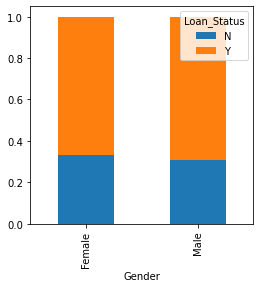

In [18]:
Gender=pd.crosstab(dataset['Gender'],dataset['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

<b>The proportion of male and female applicants is more or less the same for both approved and unapproved loans</b>

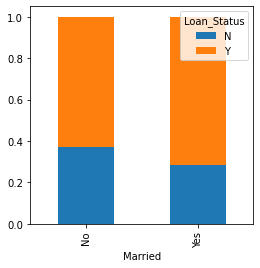

In [19]:
Married=pd.crosstab(dataset['Married'],dataset['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

<b>The proportion of married applicants is higher for approved loans.</b>

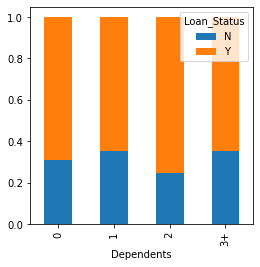

In [20]:
Dependents=pd.crosstab(dataset['Dependents'],dataset['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()


<b>Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status</b>

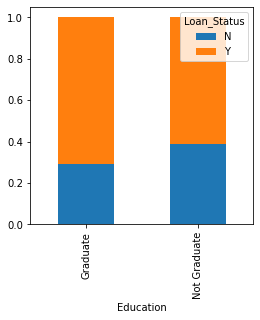

In [21]:
Education=pd.crosstab(dataset["Education"],dataset["Loan_Status"])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

<b>The proportion of graduate applicants is higher for approved loans.</b>

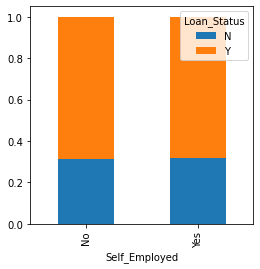

In [22]:
Self_Employed=pd.crosstab(dataset["Self_Employed"],dataset["Loan_Status"])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

<b>There is nothing significant we can infer from Self_Employed vs Loan_Status plot</b>

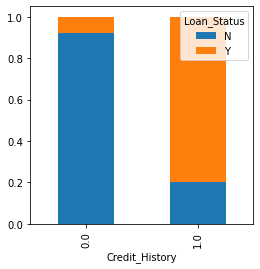

In [23]:
Credit_History=pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

<b>People with a credit history as 1 (cleared their previous debts) are more likely to get their loans approved.</b>

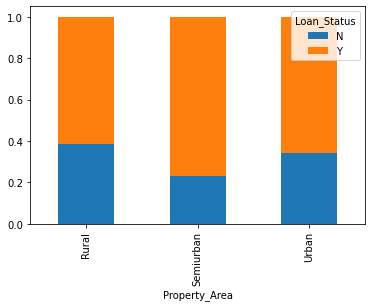

In [24]:
Property_Area=pd.crosstab(dataset['Property_Area'],dataset['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

<b>The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas</b>

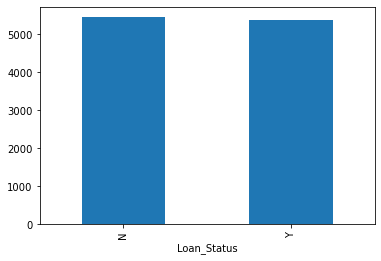

In [25]:
# Mean income of people where loan approved vs loan has not been approved.
dataset.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


<b>We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.</b>

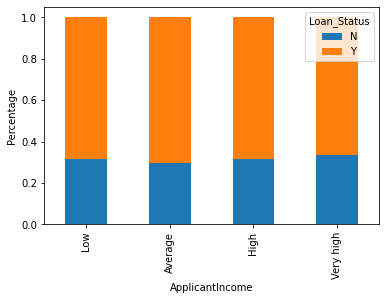

In [26]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
Incomes=pd.cut(dataset['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(Incomes,dataset['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

<b>It can be inferred that Applicant's income does not affect the chances of loan approval</b>

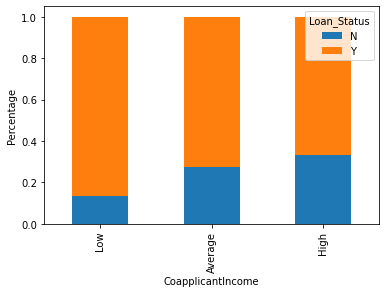

In [27]:
#Similarly analyzing co-applicant income and loan amount
bins=[0,1000,3000,42000]
group=['Low','Average','High']
Coapp_Income_Bin=pd.cut(dataset['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(Coapp_Income_Bin,dataset['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

<b>It shows that if co-applicants income is less the chances of loan approval are high. <br>  But this does not look right. The possible reason behind this may be that most of the applicants don’t have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it.</b>

<b>Hence we can make a new variable in which we will combine the applicant’s and co-applicants income to visualize the combined effect of income on loan approval.
<br>Let us combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status.</b>

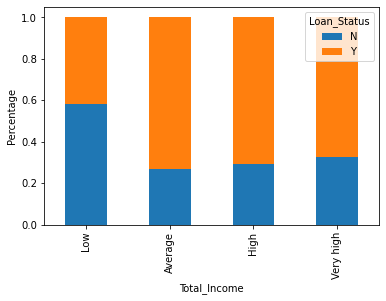

In [28]:
Total_Income=dataset['ApplicantIncome']+dataset['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
Total_Income_bin=pd.cut(Total_Income,bins,labels=group)
Total_Income_bin=pd.crosstab(Total_Income_bin,dataset['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

<b>We can see that Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.</b>

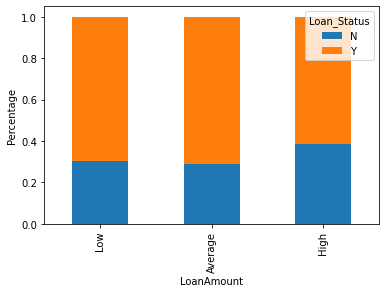

In [29]:
#Visualizing the Loan Amount variable
bins=[0,100,200,700]
group=['Low','Average','High']
Loan_Amount=pd.cut(dataset['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(Loan_Amount,dataset['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

<b>It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount<br>Thus the chances of loan approval will be high when the loan amount is less.</b>

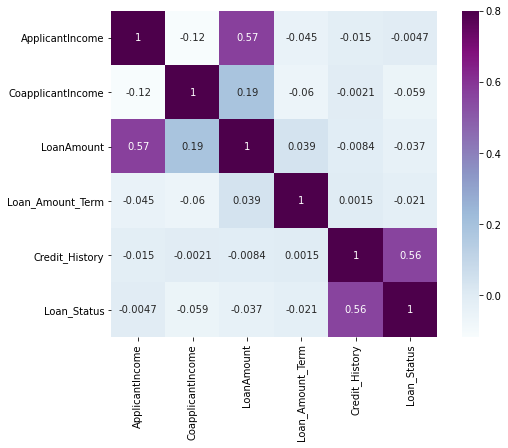

In [30]:
# Heat map to visualize the correlation
# Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

dataset["Loan_Status"].replace('N', 0,inplace=True)
dataset["Loan_Status"].replace('Y', 1,inplace=True)
matrix = dataset.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

<b>The most correlated variables are 
<li>ApplicantIncome - LoanAmount</li>
<li>Credit_History - Loan_Status</li>
<li>LoanAmount - CoapplicantIncome</li></b>

In [31]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins=True) 
#To check how credit history and loan status is dependent

Loan_Status,0,1,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<b>Hence applicants with credit history are more likely to be approved a loan</b>

## Handling Outliers

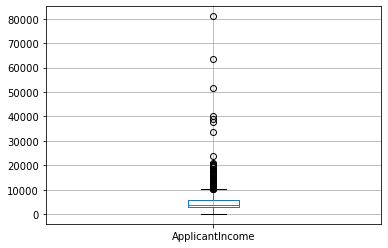

In [32]:
dataset.boxplot(column='ApplicantIncome')

Many outliers are present

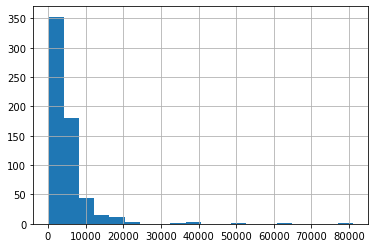

In [33]:
dataset['ApplicantIncome'].hist(bins=20)

Histogram is right skewed. Must be normalised.

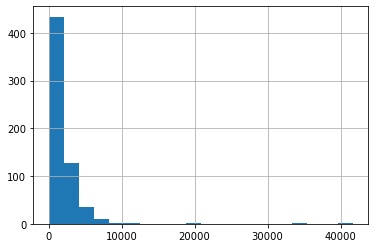

In [34]:
dataset['CoapplicantIncome'].hist(bins=20)

Histogram is right skewed. Must be normalised.

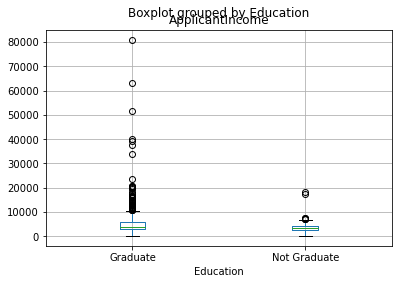

In [35]:
dataset.boxplot(column='ApplicantIncome', by='Education')

Median salaries of both the groups do not vary much. But few graduates have high salaries.

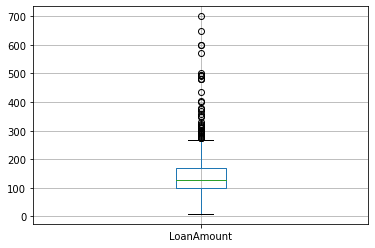

In [36]:
dataset.boxplot(column='LoanAmount')

Many outliers are present

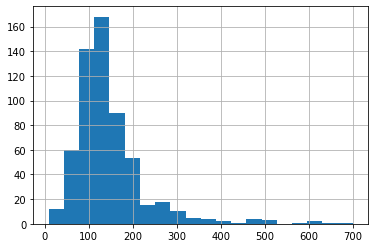

In [37]:
dataset['LoanAmount'].hist(bins=20)

Nomalising Loan Amount:

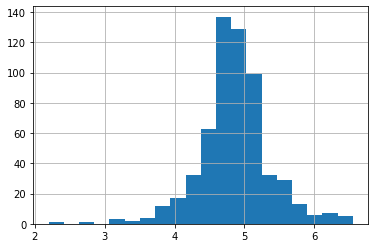

In [38]:
dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

Data looks normalised

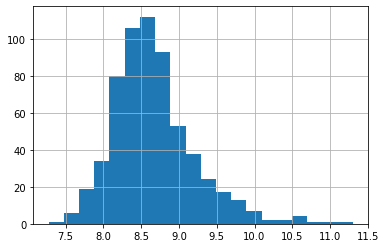

In [39]:
#Finding total income by summing applicant and co-applicant income, Finding log of total income
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['TotalIncome_log'] = np.log(dataset['TotalIncome'])
dataset['TotalIncome_log'].hist(bins=20)

In [40]:
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,NaN,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,6000.0,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1,5.587249,9613.0,9.170872
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1,4.553877,3849.0,8.255569
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0,5.062595,5540.0,8.619750
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1,5.123964,5532.0,8.618305
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0,5.855072,23809.0,10.077819


## Handling Missing Values

In [41]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
TotalIncome           0
TotalIncome_log       0
dtype: int64

Replacing missing values with mode value from the dataset for all categorical data

In [42]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True) 

In [43]:
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True) 

In [44]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True) 

In [45]:
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)

In [46]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)

In [47]:
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True) 

Replacing missing values with mean for all numerical data

In [48]:
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())

In [49]:
dataset.LoanAmount_log = dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.mean())

All missing values have been handled

In [50]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

## Dividing dataset for training and testing (80:20)

In [51]:
#Dividing dataset into independent and dependent(target) variables 
X = dataset.iloc[:, np.r_[1:5, 9:11, 13:15]].values
y = dataset.iloc[:, 12].values

In [52]:
X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729353, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [53]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

#### Splitting dataset for training and testing

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


In [57]:
# Using label encoder to convert categorical data (gender, married, education, etc.) into numeric format

#from sklearn.preprocessing import LabelEncoder
#labelencoder_X = LabelEncoder() #instance of the label encoder

from sklearn import preprocessing
labelencoder_X = preprocessing.LabelEncoder() #instance of the label encoder

In [58]:
for i in range(0, 5): #index 0 to 5 - independent variables
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i].astype(str))

In [59]:
 X_train[:,7] = labelencoder_X.fit_transform(X_train[:,7].astype(str)) #index 7

In [60]:
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 333],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 17],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 315],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 431],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 339],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 368]], dtype=object)

All string formats are converted to numeric data

In [61]:
#For y_train
labelencoder_y = preprocessing.LabelEncoder()
y_train =labelencoder_y.fit_transform(y_train)

In [62]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [63]:
#for X_test
labelencoder_X = preprocessing.LabelEncoder()
for i in range(0, 5): #index 0 to 5
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i].astype(str))
    
X_test[:,7] = labelencoder_X.fit_transform(X_test[:,7].astype(str)) #index 7
X_test

array([[1, 0, 0, 0, 4, 1.0, 4.430816798843313, 103],
       [0, 0, 0, 0, 4, 1.0, 4.718498871295094, 46],
       [1, 1, 0, 0, 4, 1.0, 5.780743515792329, 1],
       [1, 1, 0, 0, 4, 1.0, 4.700480365792417, 98],
       [1, 1, 2, 0, 4, 1.0, 4.574710978503383, 40],
       [1, 1, 0, 1, 2, 0.0, 5.10594547390058, 88],
       [1, 1, 3, 0, 2, 1.0, 5.056245805348308, 95],
       [1, 0, 0, 0, 4, 1.0, 6.003887067106539, 11],
       [1, 0, 0, 0, 4, 0.0, 4.820281565605037, 71],
       [1, 1, 0, 0, 4, 1.0, 4.852030263919617, 73],
       [0, 0, 0, 0, 4, 1.0, 4.430816798843313, 21],
       [1, 1, 1, 0, 4, 1.0, 4.553876891600541, 19],
       [0, 0, 0, 0, 4, 1.0, 5.634789603169249, 114],
       [1, 1, 2, 0, 4, 1.0, 5.4638318050256105, 115],
       [1, 1, 0, 0, 4, 1.0, 4.564348191467836, 14],
       [1, 1, 1, 0, 4, 1.0, 4.204692619390966, 40],
       [1, 0, 1, 1, 4, 1.0, 5.247024072160486, 50],
       [1, 0, 0, 1, 4, 1.0, 4.882801922586371, 43],
       [0, 0, 0, 0, 4, 1.0, 4.532599493153256, 18],
       [1,

In [64]:
#for y_test
y_test = labelencoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

### Scaling Dataset

In [65]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

### Algorithm 1: Decision Tree Classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [67]:
y_pred = DTClassifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [68]:
from sklearn import metrics
print("Accuracy score using Decision Tree= ", metrics.accuracy_score(y_pred, y_test))

Accuracy score using Decision Tree=  0.6910569105691057


### Algorithm 2: Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB
NBClassifier =GaussianNB()
NBClassifier.fit(X_train, y_train)

GaussianNB()

In [70]:
y_pred = NBClassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [71]:
print("Accuracy score using Naive Bayes = ", metrics.accuracy_score(y_pred, y_test))

Accuracy score using Naive Bayes =  0.8292682926829268


## Predicting Loan Status for test dataset using Naive Bayes Algorithm

In [72]:
testdata = pd.read_csv("loan-test.csv")

In [73]:
testdata.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [74]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [75]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [76]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0], inplace=True) 
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0], inplace=True) 
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0], inplace=True) 
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0], inplace=True) 
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0], inplace=True) 

In [77]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

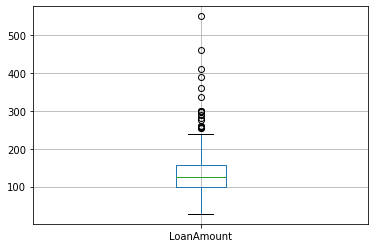

In [78]:
testdata.boxplot(column="LoanAmount")

In [79]:
testdata.LoanAmount = testdata.LoanAmount.fillna(dataset.LoanAmount.mean())

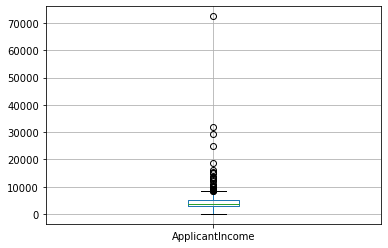

In [80]:
testdata.boxplot(column="ApplicantIncome")

In [81]:
testdata["LoanAmount_log"] = np.log(testdata["LoanAmount"])

In [82]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [83]:
testdata["TotalIncome"] = testdata["ApplicantIncome"] + testdata["CoapplicantIncome"]

In [84]:
testdata["TotalIncome_log"] = np.log(testdata["TotalIncome"])

In [85]:
testdata.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,5.023881,5587,8.628198
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,4.077537,2226,7.707962
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,4.990433,3881,8.263848
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.0,Urban,5.634790,13633,9.520249
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,4.812184,4800,8.476371


In [86]:
test = testdata.iloc[:, np.r_[1:5,9:11,13:15]].values

In [87]:
for i in range(0, 5): #index 0 to 5 - independent variables
    test[:,i] = labelencoder_X.fit_transform(test[:,i].astype(str))

In [88]:
test[:,7] = labelencoder_X.fit_transform(test[:,7].astype(str))

In [89]:
test

array([[1, 1, 0, ..., 1.0, 5720, 213],
       [1, 1, 1, ..., 1.0, 4576, 130],
       [1, 1, 2, ..., 1.0, 6800, 257],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 180],
       [1, 1, 0, ..., 1.0, 7393, 274],
       [1, 0, 0, ..., 1.0, 9200, 317]], dtype=object)

In [90]:
test = ss.fit_transform(test)

In [91]:
pred = NBClassifier.predict(test)

In [92]:
testdata.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,5.023881,5587,8.628198
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,4.077537,2226,7.707962
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,4.990433,3881,8.263848
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.0,Urban,5.634790,13633,9.520249
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,4.812184,4800,8.476371


In [93]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

The above are the predicted values for test dataset

In [94]:
testdata['Predicted_LoanStatus'] = pred

In [95]:
testdata['Eligibility'] = testdata['Predicted_LoanStatus'].map({1: "Eligible",  0:"Not Eligible"})

In [97]:
output = testdata[["Loan_ID", "Predicted_LoanStatus", "Eligibility"]]
output.head(30)

,Loan_ID,Predicted_LoanStatus,Eligibility
0,LP001015,1,Eligible
1,LP001022,1,Eligible
2,LP001031,1,Eligible
3,LP001035,1,Eligible
4,LP001051,1,Eligible
5,LP001054,1,Eligible
6,LP001055,1,Eligible
7,LP001056,0,Not Eligible
8,LP001059,1,Eligible
9,LP001067,1,Eligible


In [99]:
#to export the output dataframe into a csv file
output.to_csv("output.csv")